In [7]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from scipy.stats import kurtosis 
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import scipy.stats as stats
from scipy.stats import spearmanr
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import statsmodels.tools.tools as smt
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [8]:
model_data = pd.read_excel('integrated_data_sheet_final.xlsx')
model_data

,Year,FIPS,County,State,% DIABETIC,% OBESE,% INACTIVE
0,2018,1011,Bullock County,Alabama,9.4,18.7,17.0
1,2018,2068,Denali Borough,Alaska,6.8,18.9,16.2
2,2018,2105,Hoonah-Angoon Census Area,Alaska,7.3,19.4,15.0
3,2018,2195,Petersburg Census Area,Alaska,9.2,17.2,17.8
4,2018,2230,Skagway Municipality,Alaska,6.6,18.3,15.8
...,...,...,...,...,...,...,...
349,2018,51820,Waynesboro City,Virginia,8.6,19.5,16.6
350,2018,51830,Williamsburg City,Virginia,8.5,18.0,15.7
351,2018,51840,Winchester City,Virginia,6.9,19.4,16.1
352,2018,53055,San Juan County,Washington,4.5,19.3,11.9


# Quadratic Model 

## Model 2 : Considering Independent Variables as Inactive and Diabetic ; Dependent Variable is Obesity

r2 square is  0.3997853119395971


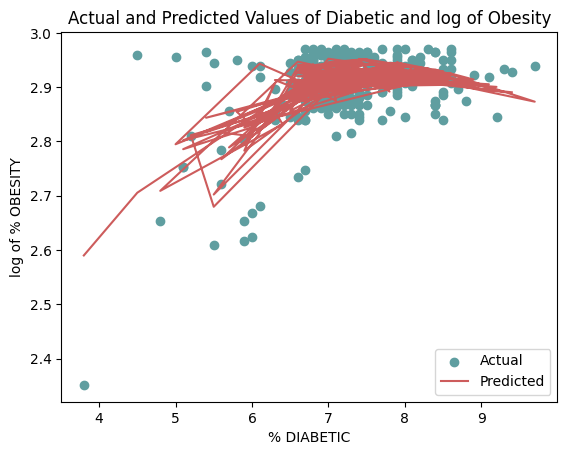

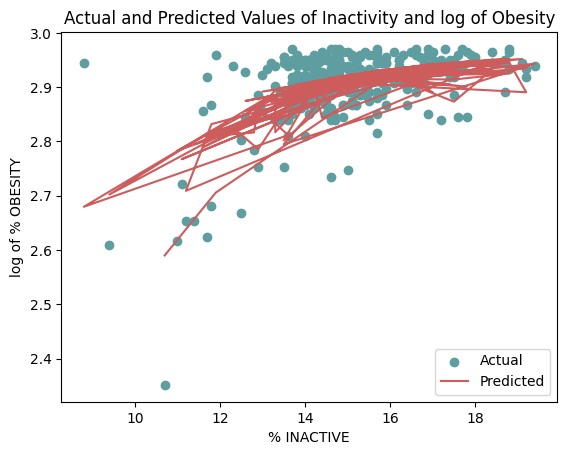

In [9]:
X = model_data[['% DIABETIC','% INACTIVE']]
y = np.log(model_data['% OBESE'])

pf = PolynomialFeatures(degree=2)
x_poly = pf.fit_transform(X)

Lr2 = LinearRegression()
Lr2.fit(x_poly, y)

y_predictions = Lr2.predict(x_poly)
r2 = r2_score(y, y_predictions)
print("r2 square is ",r2)


plt.scatter(X['% DIABETIC'], y,label='Actual',color = 'cadetblue')
plt.plot(X['% DIABETIC'], y_predictions, label='Predicted', color = 'indianred')
plt.xlabel('% DIABETIC')
plt.ylabel('log of % OBESITY')
plt.title("Actual and Predicted Values of Diabetic and log of Obesity")
plt.legend()
plt.show()

plt.scatter(X['% INACTIVE'], y,label='Actual',color = 'cadetblue')
plt.plot(X['% INACTIVE'], y_predictions, label='Predicted', color = 'indianred')
plt.xlabel('% INACTIVE')
plt.ylabel('log of % OBESITY')
plt.title("Actual and Predicted Values of Inactivity and log of Obesity")

plt.legend()
plt.show()